In [1]:
import os
import glob
import pandas as pd
import time
import matplotlib.pyplot as plt

In [20]:
plt.rcParams['figure.figsize'] = [35, 15]

In [2]:
data_path = "/home/srivasta/shared/us_presidential_election_2020/SimpleExtractionFeatures/vp_debate_version2"
os.chdir(data_path)

In [3]:
#specify datatypes so that datatype guessing isnt done (looks like he has mentioned default returned value as 'none' string everywhere)
dtype={'No User Mentions':int,'mention_content': object}
df = pd.read_csv('SED/mentions_content.csv',dtype=dtype,lineterminator='\n')

In [4]:
df.head()

,No User Mentions,mention_content
0,2,"(2, ['Tina Neely', 'Donald J. Trump'])"
1,4,"(4, ['Republican Voters Against Trump', 'YouTu..."
2,1,"(1, ['Korietta Koch PhD'])"
3,1,"(1, ['Joe Biden'])"
4,1,"(1, ['Paul Sperry'])"


In [10]:
mention_dict = {}

def get_mentions(df):
    for index, row in df.iterrows():
        tup = eval(row['mention_content'])
        mentions = tup[1] 
        for mt in mentions:
            if mt.lower() in mention_dict:
                mention_dict[mt.lower()]+=1
            else:
                mention_dict[mt.lower()]=1
    #print(mention_dict)

In [11]:
get_mentions(df)

In [12]:
from operator import itemgetter
def print_top_n_values(N):
    res = dict(sorted(mention_dict.items(), key = itemgetter(1), reverse = True)[:N])
    return res


In [13]:
print("Top 30 values: ", print_top_n_values(30))

Top 30 values:  {'donald j. trump': 83125, 'kamala harris': 64494, 'joe biden': 50265, 'vice president mike pence': 27723, 'mike pence': 17497, 'youtube': 8553, 'alexandria ocasio-cortez': 7926, 'donald trump jr.': 6765, 'cnn': 5942, 'nancy pelosi': 5882, 'president trump': 5714, 'fox news': 4458, 'james woods': 4275, 'gop': 4227, 'the hill': 4209, 'the lincoln project': 3401, 'pete buttigieg': 3393, 'team trump (text vote to 88022)': 3230, 'hillary clinton': 3155, 'megyn kelly': 3071, 'eric trump': 3053, 'sean hannity': 3030, 'susan page': 2950, 'marco rubio': 2888, 'msnbc': 2873, 'kayleigh mcenany': 2725, 'dan bongino': 2604, 'the new york times': 2604, 'harlan z. hill \u1f1fa\u1f1f8': 2552, 'ben shapiro': 2336}


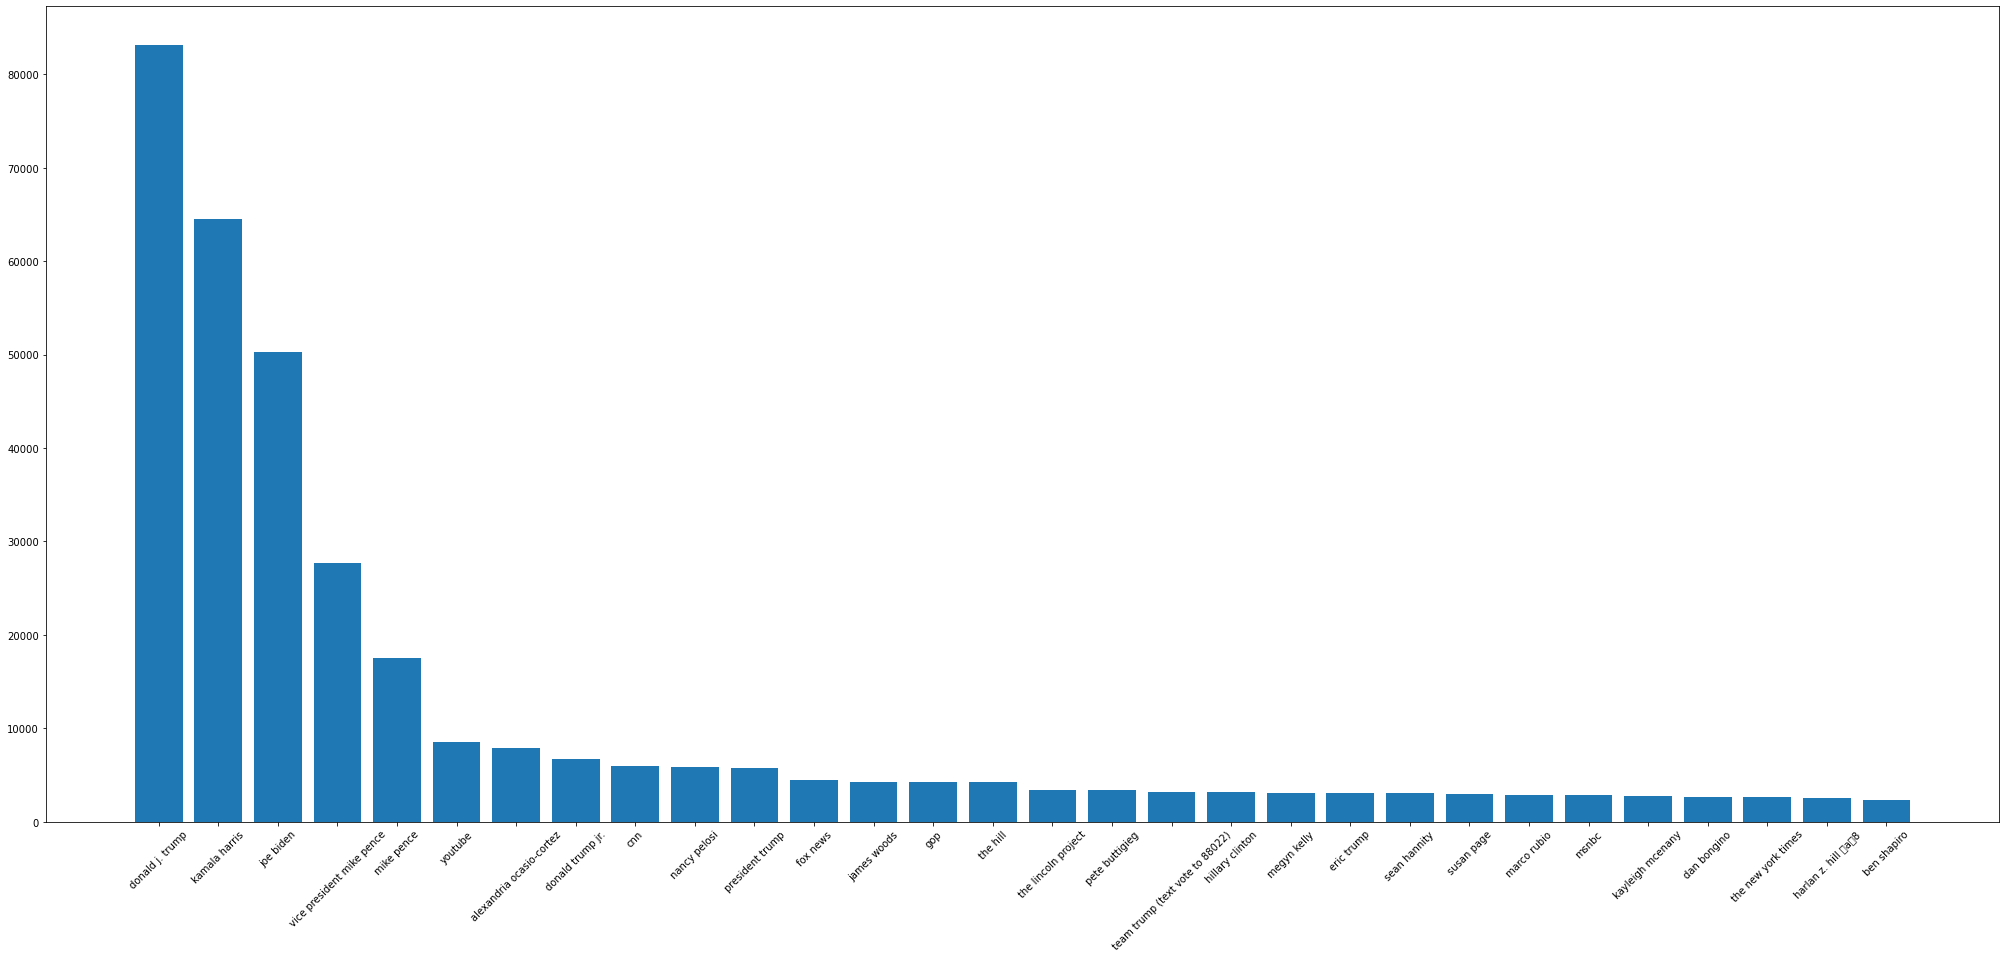

In [21]:
data = print_top_n_values(30)
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(rotation = 45)
plt.show()